In [1]:
import numpy as np
import cv2  as cv
import matplotlib.pyplot as plt

In [2]:
image = cv.imread('test_fixed.png')

In [3]:
histSize = [256]
range = [0, 256]


def plot_rgb_hist(image, histSize, range):
    histSize = [256]
    range = [0, 256]
    for i, col in enumerate(['b', 'g', 'r']):
        hist = cv.calcHist([image], [i], None, histSize, range)
        plt.plot(hist, color=col)
        plt.xlim(range)

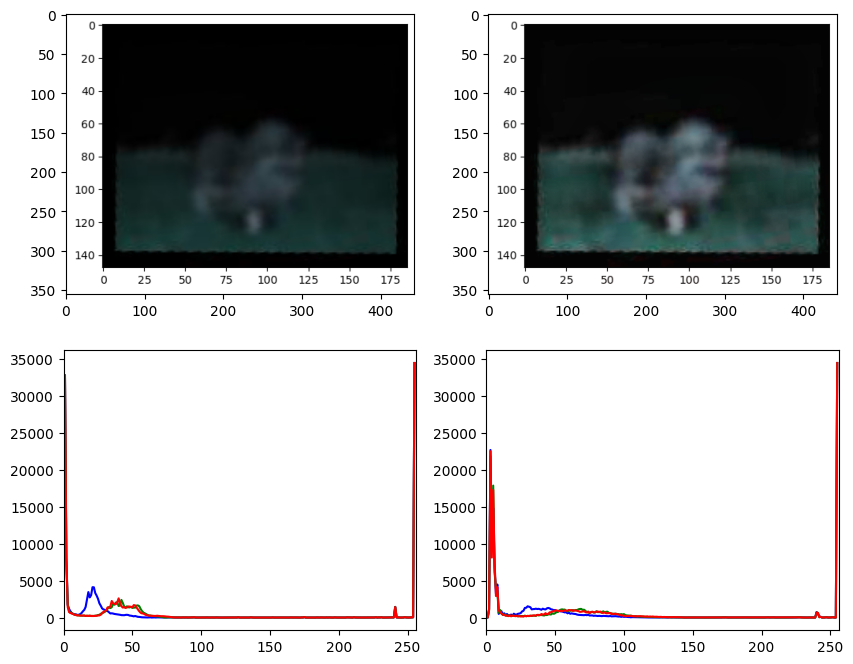

In [4]:
image
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

rgb_result_image = np.empty(np.shape(image), np.uint8)
rgb_result_image[:, :, 1] = clahe.apply(image[:, :, 1])
rgb_result_image[:, :, 2] = clahe.apply(image[:, :, 2])
rgb_result_image[:, :, 0] =clahe.apply(image[:, :, 0])


gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(image)
plt.subplot(gs[1])
plt.imshow(rgb_result_image)
plt.subplot(gs[2])
plot_rgb_hist(image, histSize, range)
plt.subplot(gs[3])
plot_rgb_hist(rgb_result_image, histSize, range)

cv.imwrite("rgb_result_image.jpg", rgb_result_image)
plt.show()

# Улучшение изображения

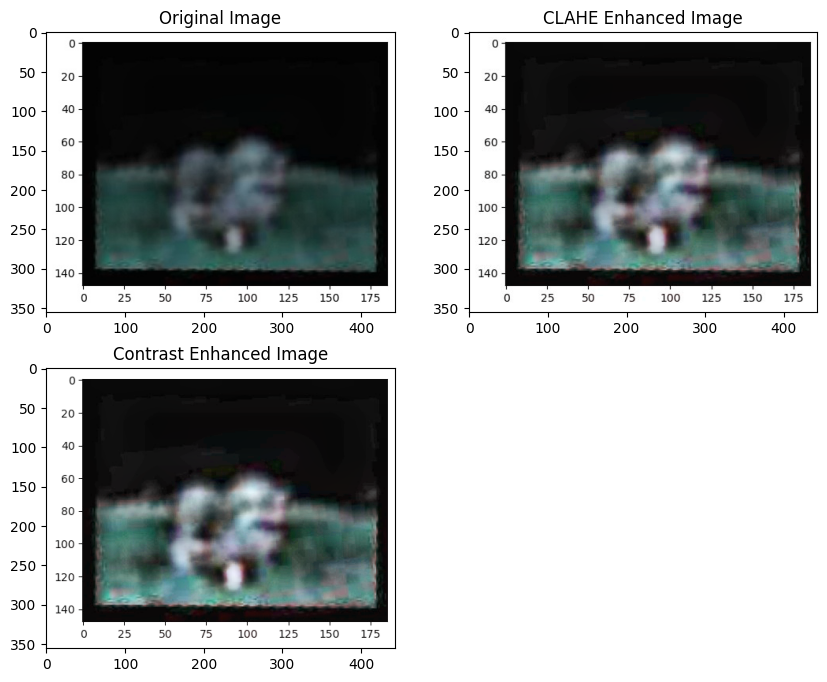

In [5]:
# Перевод в RGB
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения
image = cv2.imread("rgb_result_image.jpg")

# Применение CLAHE для улучшения контрастности
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
rgb_result_image = np.empty(np.shape(image), np.uint8)
rgb_result_image[:, :, 1] = clahe.apply(image[:, :, 1])
rgb_result_image[:, :, 2] = clahe.apply(image[:, :, 2])
rgb_result_image[:, :, 0] = clahe.apply(image[:, :, 0])

# Увеличение контрастности
alpha = 1.1  # Параметр контрастности (можно настроить)
adjusted_image = cv2.convertScaleAbs(rgb_result_image, alpha=alpha, beta=0)

# Отображение изображений до и после обработки
gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))

plt.subplot(gs[0])
plt.imshow(image)
plt.title("Original Image")

plt.subplot(gs[1])
plt.imshow(rgb_result_image)
plt.title("CLAHE Enhanced Image")

plt.subplot(gs[2])
plt.imshow(adjusted_image)
plt.title("Contrast Enhanced Image")

# Сохранение изображения с увеличенной контрастностью
cv2.imwrite("contrast.jpg", adjusted_image)

plt.show()


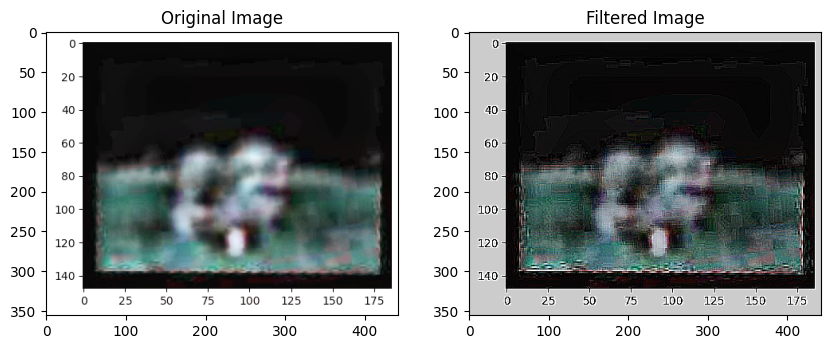

True

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Загрузите исходное изображение
original_image = cv.imread("contrast.jpg")


# Определите ядро для фильтрации
kernel = np.array([[-1, -1, -1], [-1, 8.9, -1], [-1, -1, -1]])

# Примените фильтр к изображению
filtered_image = cv.filter2D(adjusted_image, -1, kernel)

# Визуализация результатов
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(adjusted_image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title("Filtered Image")

plt.show()

# Сохранение фильтрованного изображения
cv.imwrite("result_image.jpg", cv.cvtColor(filtered_image, cv.COLOR_RGB2BGR))
